In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

## Assignment

### Part 1

In [6]:
from sklearn import decomposition

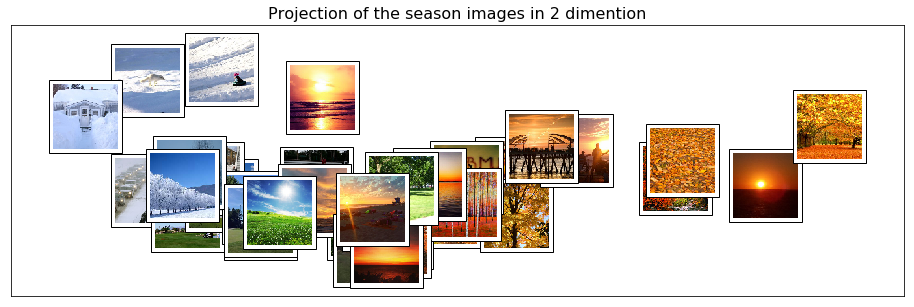

In [7]:
# PCA transformation and ploting the results
X_pca = decomposition.PCA(n_components = 2)
X_projection = X_pca.fit_transform(X)
plot_image_space(images, X_projection, "Projection of the season images in 2 dimention")

The plot generated displays the images according to the top 2 principal components(or eigenvectors) found by the PCA transformation of the image histogram. 

### Part 2

Images that are closer together in this 2-dimensional space have values that are more similar along these two axes. The images that are close together are more similar in the color. Here, the winter pictures with similar color are closer together and similarly, the fall pictures haveing similar shades are more close together. The shape of the images is another influencing factor. The winter pictures with similar shapes are tightly packed in comparison of the autum pictures on the other side which are sparse in comparison. 

### Part 3 (1)

In [8]:
img_dir = os.path.join(os.getcwd(), "Images2") # directory path
Images2 = load_images(img_dir) # load images in the specified directory

In [9]:
X_images2 = pd.DataFrame([im.histogram() for im in Images2])

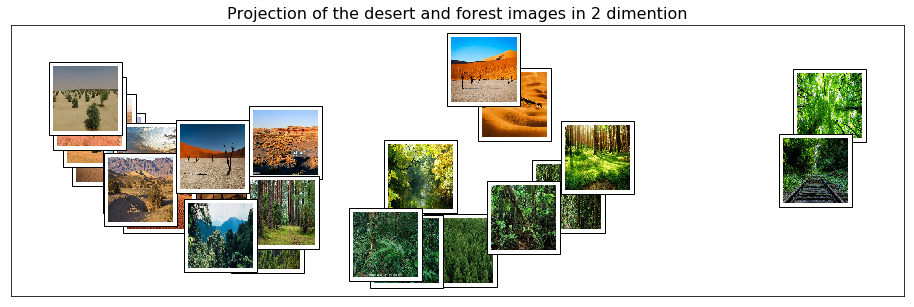

In [10]:
# PCA transformation and ploting the results
X_pca = decomposition.PCA(n_components = 2)
X_projection = X_pca.fit_transform(X_images2)
plot_image_space(Images2, X_projection, "Projection of the desert and forest images in 2 dimention")

The above plot displays the projection of the landscape images according to top two principal components found by 
PCA dimensionality reduction. We see that the forest landscape are grouped on right and desert landscape are on the left clustered together. Thus the PCA reduction worked according to expectation. 

### Part 3 (2)

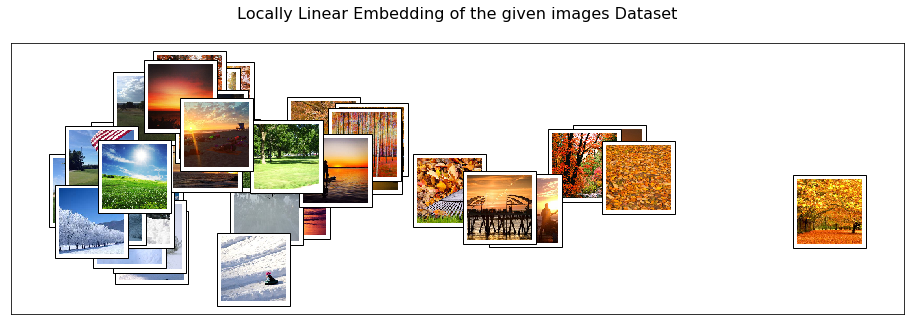

In [11]:
# Compute LLE two-dimensional on the images of landscapes (forests and deserts)
from sklearn import manifold

classifier = manifold.LocallyLinearEmbedding(n_neighbors=29, n_components=2, method='standard')
X_lle = classifier.fit_transform(X)

# Plot LLE image projection
plot_image_space(images, X_lle, "Locally Linear Embedding of the given images Dataset\n")

Another method to project our dataset into 2 dimensions is locally linear embedding (LLE).

<p>What is LLE?:</p>
LLE finds a set of the nearest neighbors of each point, computes a set of weights for each point that best describe the point as a linear combination of its neighbors, and then finds the low-dimensional embedding of points such that each point is still described with the same linear combination of its neighbors.[1]

In the LLE plot above, we observe that the distiction of the seasons winter and autum is not as prominent as it is in the PCA reduction. The autum season pictures are sparse and winter pictures are clustered together. Changing the value of nearest neighbors changes the position of the images. With trial and error, I found that some value like 30 even flips the graph completely starting the plot with autum pictures and then the winter.

The 2 dimensions generated by LLE which here uses a set of 29 nearest neighbors for each point are displayed in the plot above. We observe that the positioning of the projection doesn't appear to be better than that generated by PCA. Infact, the results generated are worse than the result generate by PCA.

***
### References


1. https://github.com/cse40647/cse40647/blob/fa.14/08%20-%20Dimensionality%20Reduction.ipynb 
2. https://github.com/NUOEL/cs6220/blob/master/M03-A01%20-%20Assignment%20Functions.ipynb 
3. http://scikit-learn.org/stable/modules/manifold.html 